In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dfrrt = pd.read_csv('data/stabilitydatarrt.csv')
dfrrtu = pd.read_csv('data/stabilitydatarrtu.csv')

In [9]:
print(dfrrt)

   STABILITYrrt  speedrrt
0        1.0000  0.950817
1        1.0000  1.176398
2        1.0000  1.610666
3        0.7850  1.690010
4        0.6428  2.266667
5        0.4280  2.529697
6        0.4280  2.700042
7        0.5000  2.682373
8        0.3571  3.179622


In [8]:
dfrrtu

,STABILITYrrtu,speedrrtu
0,1.000,1.206064
1,1.000,1.501868
2,0.933,1.950146
3,0.933,2.649603
4,0.866,2.832863
5,0.733,2.733953
6,0.800,3.157517
7,0.666,2.903811
8,0.333,3.483658


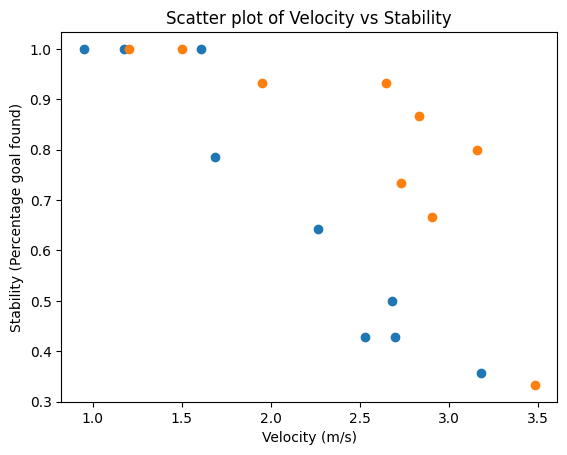

In [14]:
# Replace 'column1' and 'column2' with the names of the columns you want to plot
plt.scatter(dfrrt['speedrrt'], dfrrt['STABILITYrrt'])
plt.scatter(dfrrtu['speedrrtu'], dfrrtu['STABILITYrrtu'])

plt.xlabel('Velocity (m/s)')
plt.ylabel('Stability (Percentage goal found)')
plt.title('Scatter plot of Velocity vs Stability')

plt.show()

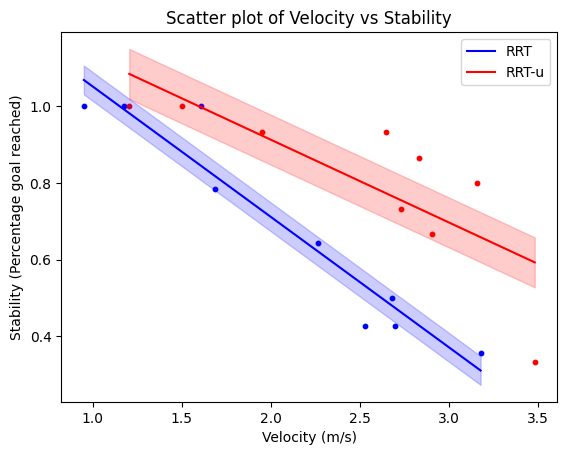

In [20]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Calculate the regression line
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(dfrrt['speedrrt'], dfrrt['STABILITYrrt'])
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(dfrrtu['speedrrtu'], dfrrtu['STABILITYrrtu'])

# Create an array of x values from the minimum and maximum x values in your data for the regression lines
x1 = np.linspace(dfrrt['speedrrt'].min(), dfrrt['speedrrt'].max(), 100)
x2 = np.linspace(dfrrtu['speedrrtu'].min(), dfrrtu['speedrrtu'].max(), 100)

# Plot scatter plots
plt.scatter(dfrrt['speedrrt'], dfrrt['STABILITYrrt'], s=10, c='blue')
plt.scatter(dfrrtu['speedrrtu'], dfrrtu['STABILITYrrtu'], s=10, c='red')

# Plot regression lines
plt.plot(x1, intercept1 + slope1*x1, 'b', label='RRT')
plt.plot(x2, intercept2 + slope2*x2, 'r', label='RRT-u')

# Create a shaded region for the error
plt.fill_between(x1, intercept1 + slope1*x1 - std_err1, intercept1 + slope1*x1 + std_err1, color='blue', alpha=0.2)
plt.fill_between(x2, intercept2 + slope2*x2 - std_err2, intercept2 + slope2*x2 + std_err2, color='red', alpha=0.2)

plt.xlabel('Velocity (m/s)')
plt.ylabel('Stability (Percentage goal reached)')
plt.title('Scatter plot of Velocity vs Stability')
plt.legend()

plt.show()